<a href="https://colab.research.google.com/github/Sourav61/Goeduhub-Assignments/blob/main/Task_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Author: <a href = "https://github.com/Sourav61">Sourav Pahwa</a>
<br>ID: GO_STP_13420

Practice KNN - We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not. 

DataSet-Click Here for Download <a href="https://drive.google.com/file/d/1AyN2ACOsNk4_YdpZVHpODGAb3YQh5LHp/view">user_data.csv </a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("User_Data.csv")

In [4]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.keys

<bound method NDFrame.keys of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [9]:
df.describe(include="object")

,Gender
count,400
unique,2
top,Female
freq,204


In [10]:
df.describe().style.background_gradient(cmap='CMRmap_r', low=0, high=0, axis=0, subset=None, text_color_threshold=0.408, vmin=None, vmax=None)

,User ID,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,15691539.757500,37.655000,69742.500000,0.357500
std,71658.321581,10.482877,34096.960282,0.479864
min,15566689.000000,18.000000,15000.000000,0.000000
25%,15626763.750000,29.750000,43000.000000,0.000000
50%,15694341.500000,37.000000,70000.000000,0.000000
75%,15750363.000000,46.000000,88000.000000,1.000000
max,15815236.000000,60.000000,150000.000000,1.000000


In [11]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
User ID,int64,400,[15624510 15810944 15668575 15603246 15804002 ...
Gender,object,2,['Male' 'Female']
Age,int64,43,[19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 ...
EstimatedSalary,int64,117,[ 19000 20000 43000 57000 76000 58000 84...
Purchased,int64,2,[0 1]


In [12]:
df.kurt()

User ID           -1.182359
Age               -0.622513
EstimatedSalary   -0.405878
Purchased         -1.651992
dtype: float64

In [13]:
df.skew()

User ID           -0.034513
Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

In [14]:
df.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [15]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [16]:
df.axes

[RangeIndex(start=0, stop=400, step=1),
 Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')]

In [17]:
df.items

<bound method DataFrame.items of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [18]:
df.ndim

2

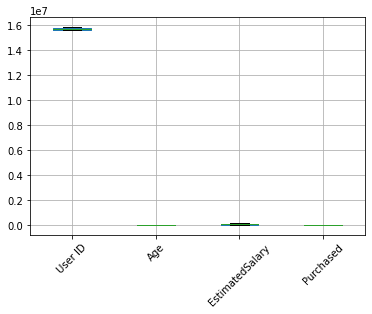

In [19]:
df.boxplot(rot=45)
plt.show()

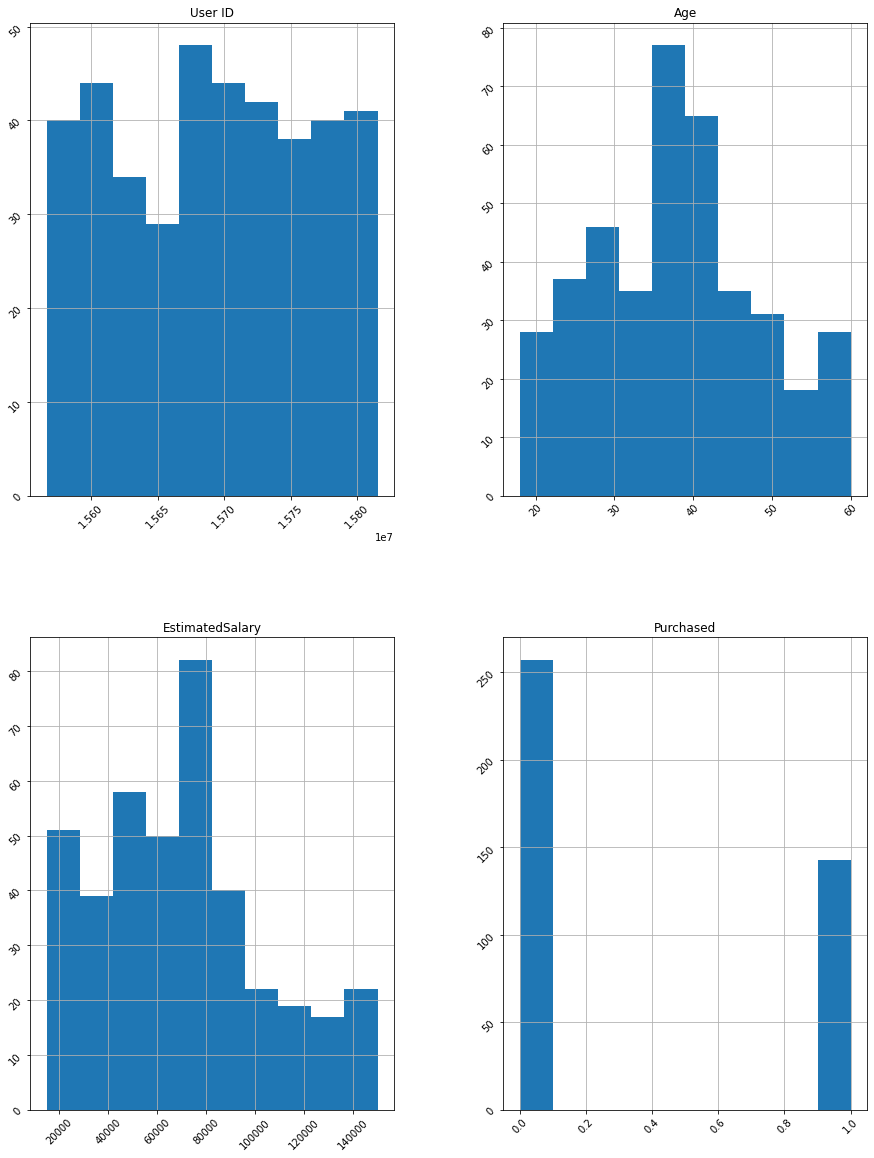

In [20]:
df.hist(figsize=(15,20),xrot=45,yrot=45)
plt.show()

In [21]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [22]:
df.duplicated().any()

False

In [23]:
df.duplicated().sum() 

0

In [24]:
df.isna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [25]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [26]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

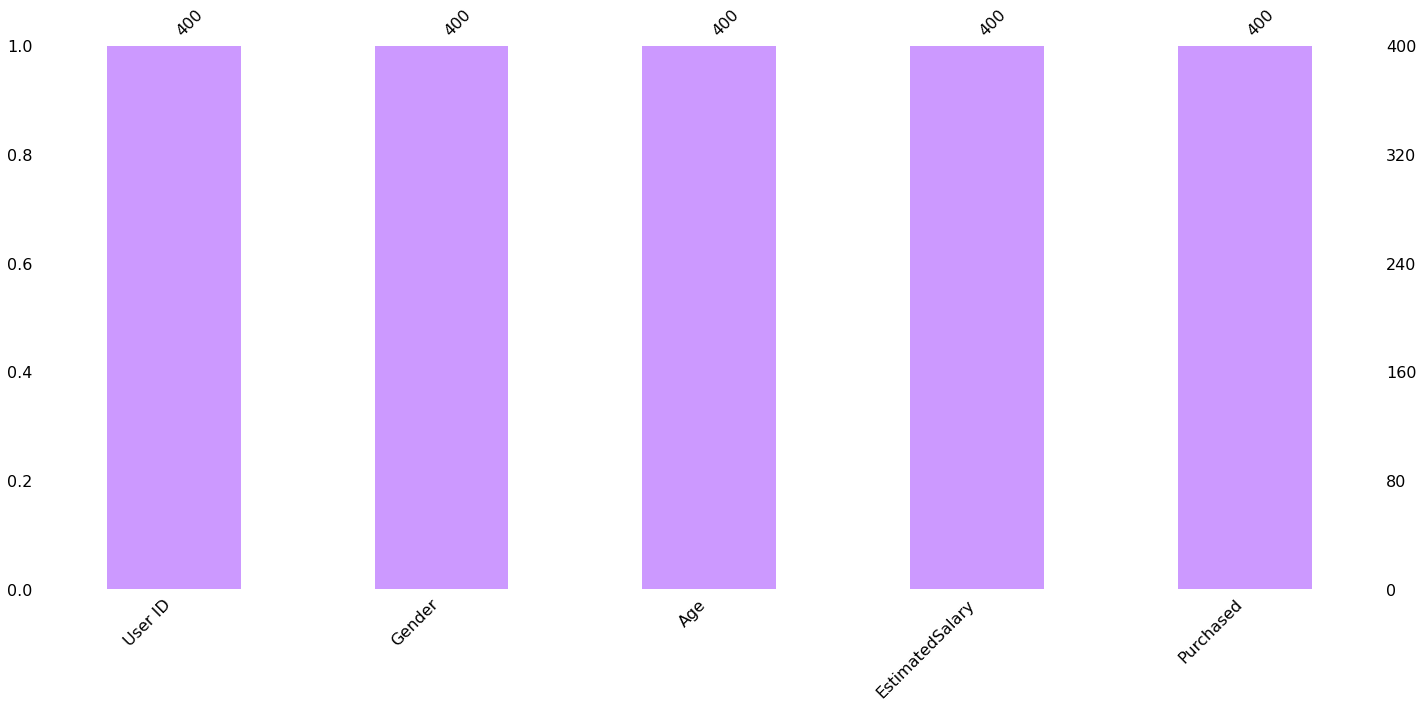

In [27]:
msno.bar(df.sample(400),color=("#CC99FF"))
plt.show()

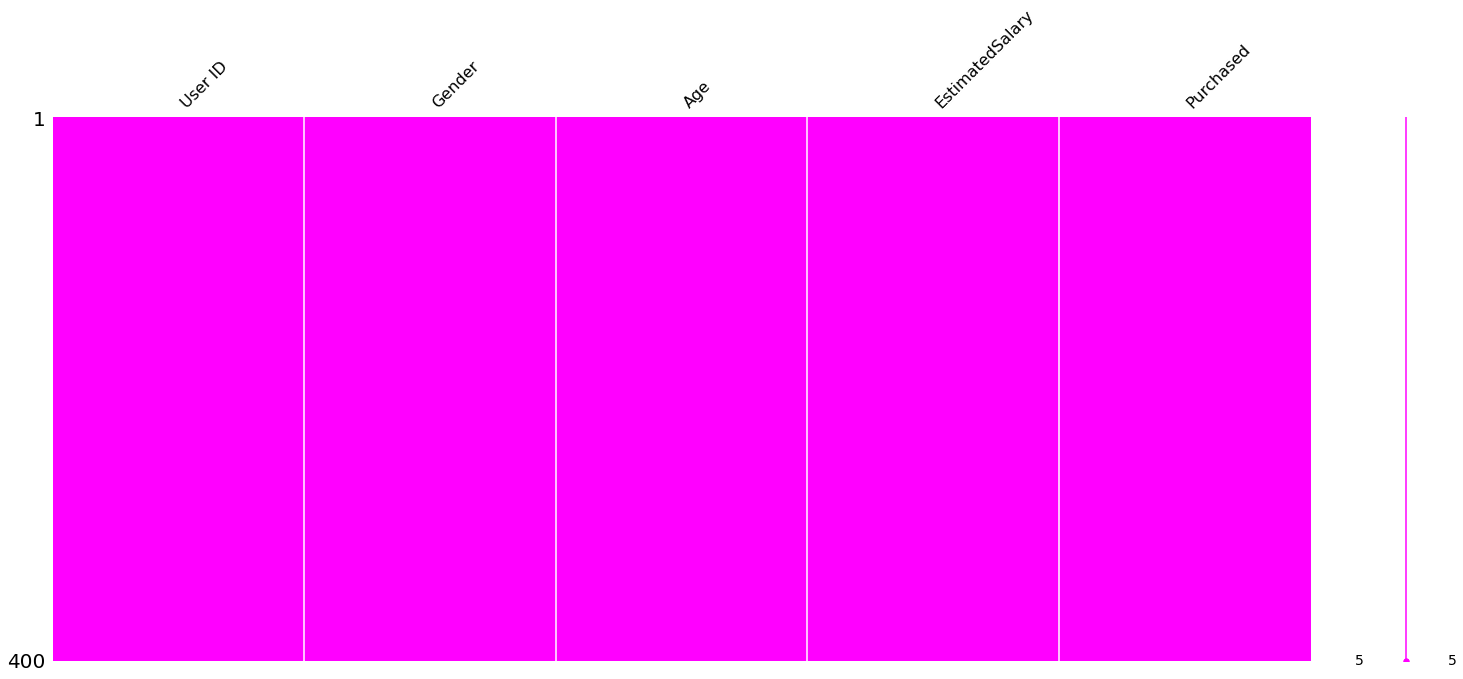

In [28]:
msno.matrix(df.sample(400),color=(1, 0, 1))
plt.show()

In [29]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


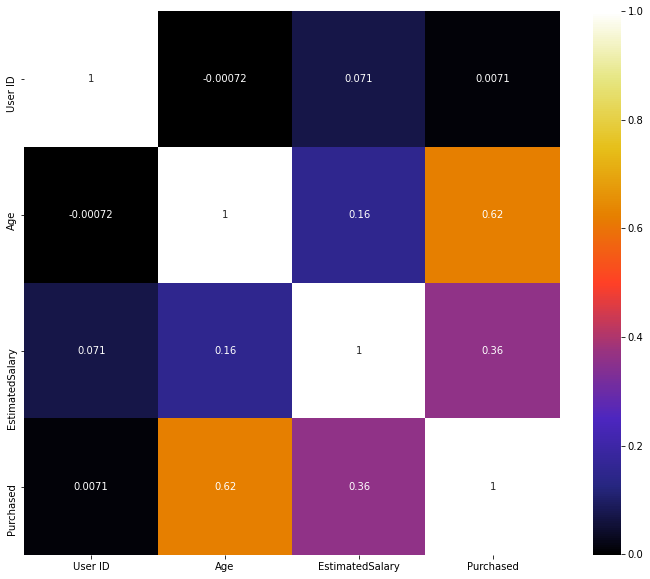

In [30]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='CMRmap', annot = True) 
plt.show()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


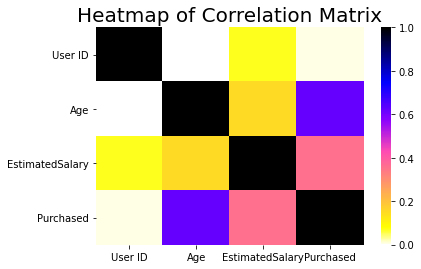

In [31]:
corr = df.corr()
sns.heatmap((corr),
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,cmap='gnuplot2_r',annot=False,fmt=".2g")
plt.title('Heatmap of Correlation Matrix', fontsize=20)
corr

In [32]:
df.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


In [33]:
df.groupby('Purchased').var()

,User ID,Age,EstimatedSalary
Purchased,,,
0,5.196529e+09,63.773711,5.929990e+08
1,5.059266e+09,74.169507,1.769397e+09


In [34]:
df.groupby('Purchased').std()

,User ID,Age,EstimatedSalary
Purchased,,,
0,72086.957429,7.985844,24351.570102
1,71128.514008,8.612172,42064.200064


In [35]:
df.groupby('Purchased').cov()

User ID            Age  EstimatedSalary
Purchased                                                              
0         User ID          5.196529e+09  -20785.046769     7.535526e+07
          Age             -2.078505e+04      63.773711     3.507762e+04
          EstimatedSalary  7.535526e+07   35077.623419     5.929990e+08
1         User ID          5.059266e+09   26594.876637     3.345612e+08
          Age              2.659488e+04      74.169507    -1.336850e+05
          EstimatedSalary  3.345612e+08 -133685.019206     1.769397e+09

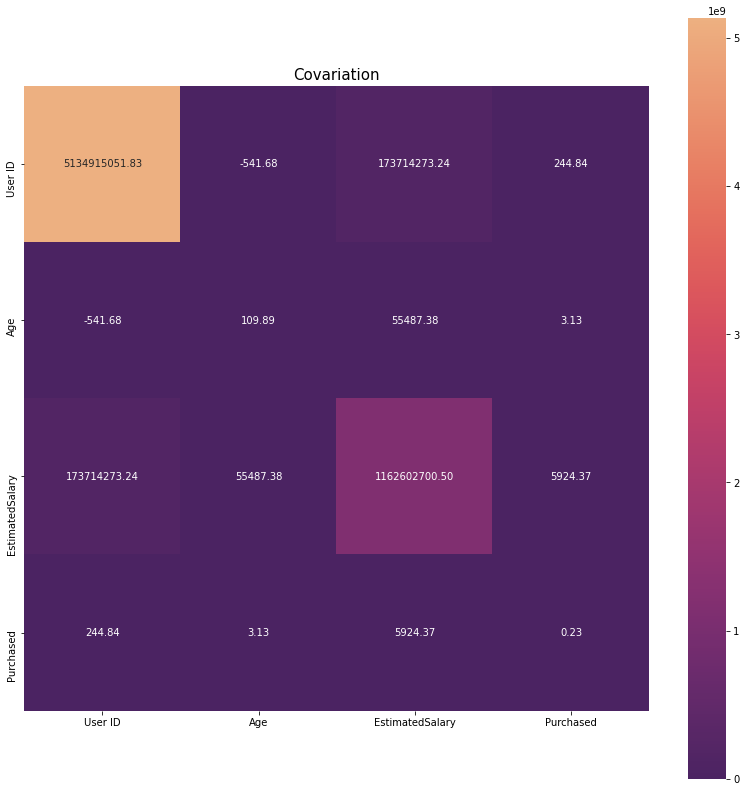

In [36]:
plt.figure(figsize=(14,14))
sns.heatmap(df.cov(), annot=True, fmt =".2f",square=True,cmap='flare_r')
plt.title("Covariation",fontsize = 15)
plt.show()

In [37]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

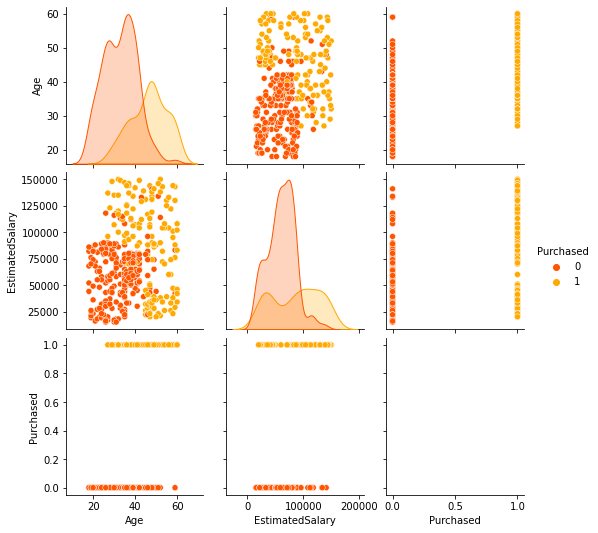

In [38]:
sns.pairplot(df,
             x_vars = ['Age', 'EstimatedSalary', 'Purchased'],
             y_vars = ['Age', 'EstimatedSalary', 'Purchased'],
       diag_kind='kde',hue='Purchased', palette="autumn"
             )
plt.show()

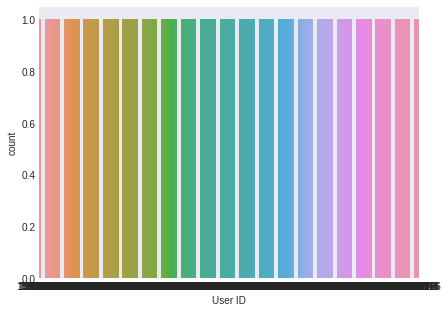

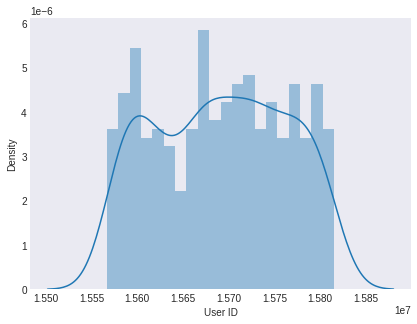

In [39]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-dark')

plt.subplot(1, 2, 1)
sns.countplot(df['User ID'])
plt.show()

plt.xlabel('User ID', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(df["User ID"], bins = 20)
plt.show()

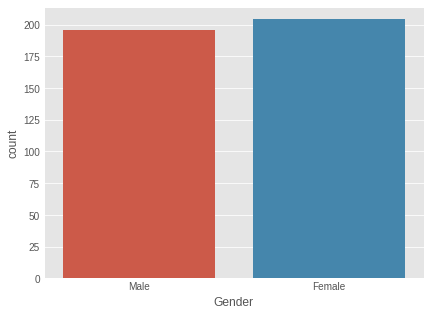

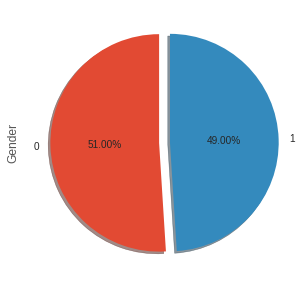

In [40]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
sns.countplot(df['Gender'])
plt.show()

plt.xlabel('Gender', fontsize = 15)

plt.subplot(1, 2, 2)
df['Gender'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.show()

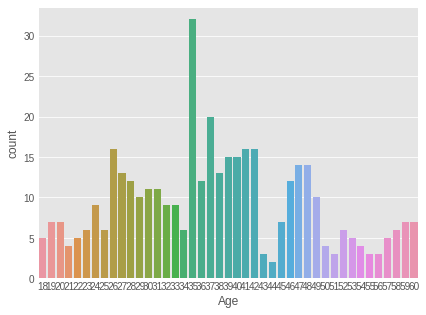

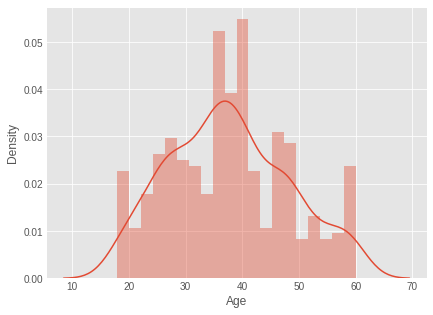

In [41]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
sns.countplot(df['Age'])
plt.show()

plt.xlabel('Age', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(df["Age"], bins = 20)
plt.show()

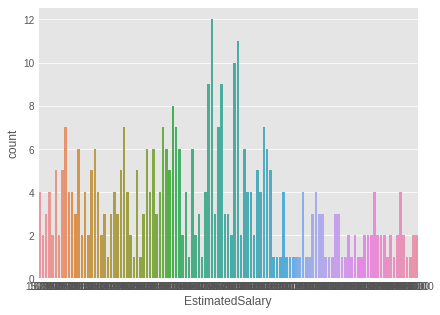

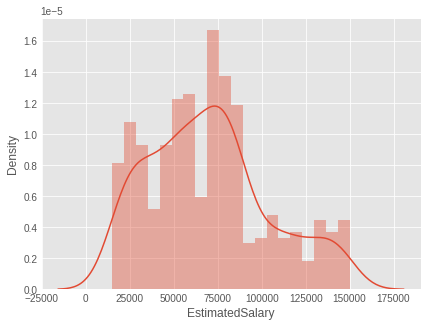

In [42]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
sns.countplot(df['EstimatedSalary'])
plt.show()

plt.xlabel('EstimatedSalary', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(df["EstimatedSalary"], bins = 20)
plt.show()

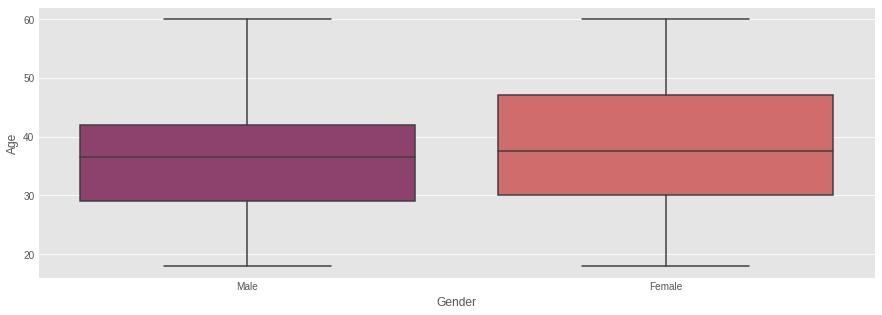

In [43]:
sns.boxplot(y='Age', x='Gender', data = df, palette = 'flare_r')
plt.show()

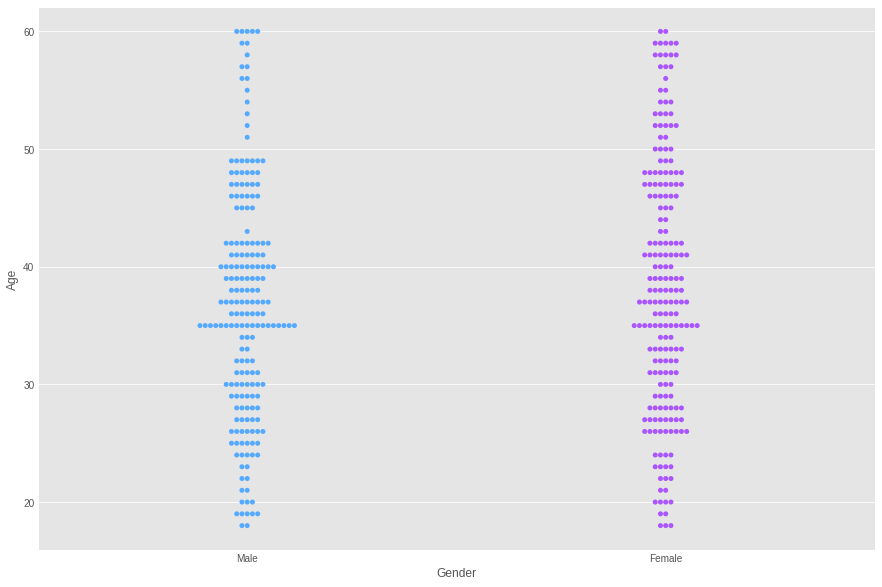

In [44]:
plt.figure(figsize=(15,10))
sns.swarmplot(y = "Age", x = "Gender", data = df, palette = 'cool')
plt.show()

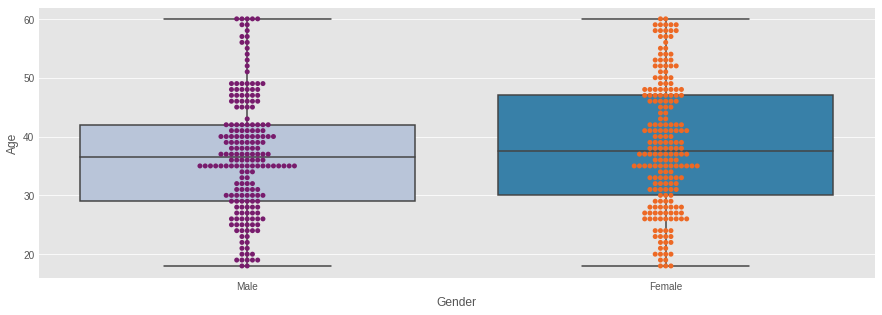

In [45]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-bright')

sns.boxplot(y='Age', x='Gender', data = df, palette = 'PuBu')
sns.swarmplot(y='Age', x='Gender', data = df, palette = 'inferno')
plt.show()

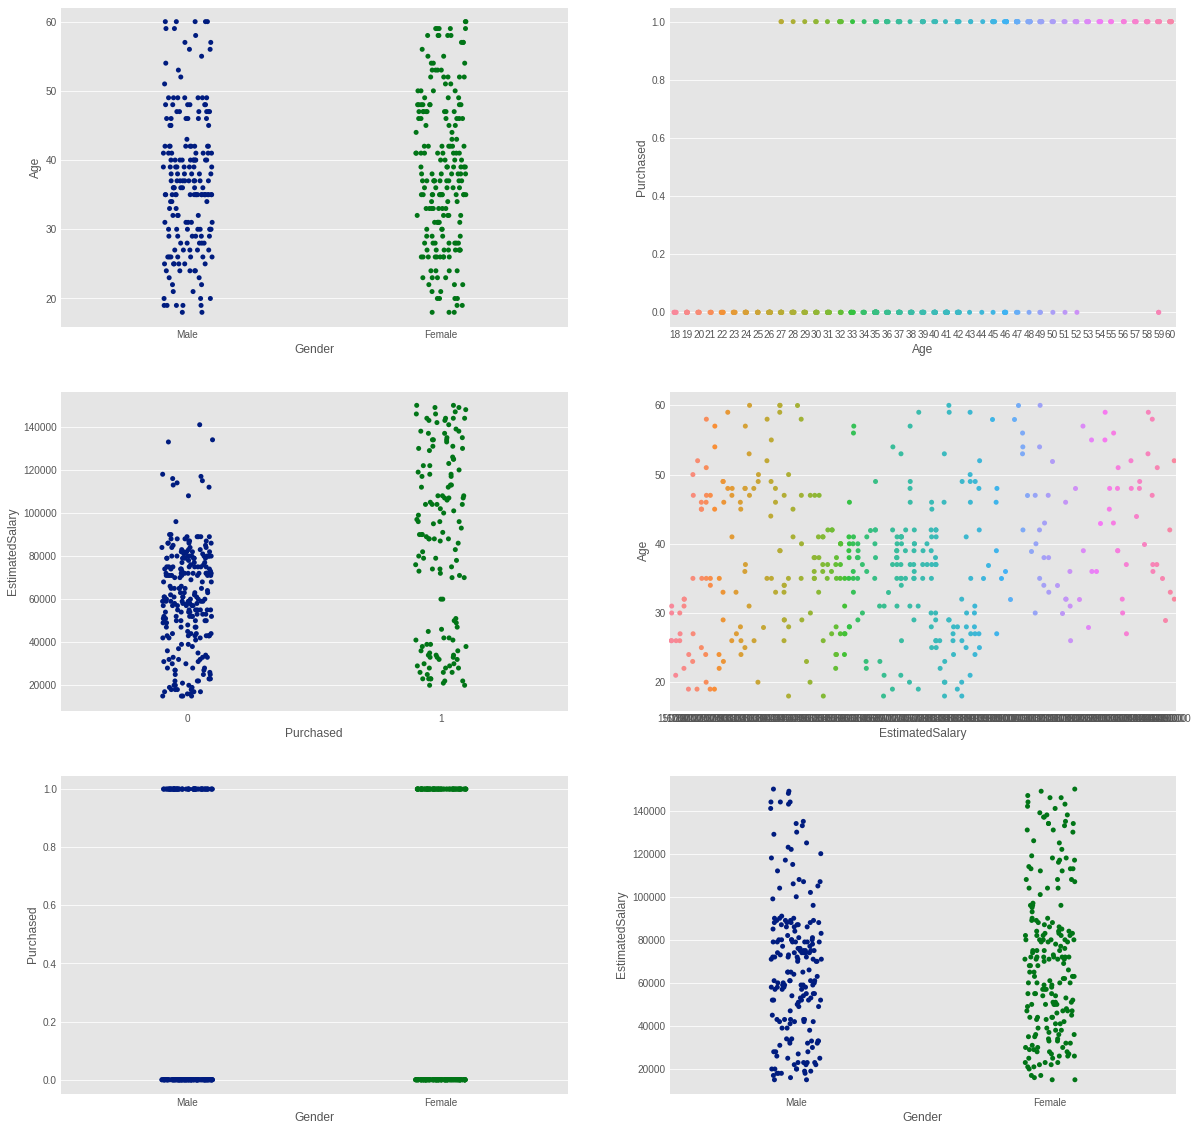

In [46]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-dark-palette')

fig, axarr = plt.subplots(3,2, figsize=(20,20))

sns.stripplot(y='Age', x='Gender', data=df, hue=None, ax=axarr[0][0])
sns.stripplot(y='Purchased', x='Age', data=df, hue=None, ax=axarr[0][1])
sns.stripplot(y='EstimatedSalary', x='Purchased', data=df, hue=None, ax=axarr[1][0])
sns.stripplot(y='Age', x='EstimatedSalary', data=df, hue=None, ax=axarr[1][1])
sns.stripplot(x='Gender', y='Purchased', data=df, hue=None, ax=axarr[2][0])
sns.stripplot(y='EstimatedSalary', x='Gender', data=df, hue=None,  ax=axarr[2][1])

plt.show()

In [47]:
fig = px.histogram(df, 
                   x='Age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [48]:
fig = px.histogram(df, 
                   x='EstimatedSalary', 
                   marginal='box', 
                   color='Gender',
                   color_discrete_sequence=['tomato','darkcyan'], 
                   title='Gender Classification')
fig.update_layout(bargap=0.1)
fig.show()

In [49]:
fig = px.histogram(df, 
                   x='Age', 
                   marginal='box', 
                   color='Gender', 
                   color_discrete_sequence=['darkgreen', 'aquamarine'], 
                   title='Expenses according to Age')
fig.update_layout(bargap=0.1)
fig.show()

In [50]:
fig = px.scatter(df, 
                 x='Age', 
                 y='EstimatedSalary', 
                 color='Purchased', 
                 opacity=0.7, 
                 hover_data=['Gender'], 
                 title='Age VS Estimated Salary')
fig.update_traces(marker_size=5)
fig.show()

In [51]:
fig = px.scatter(df, 
                 x='EstimatedSalary', 
                 y='User ID', 
                 color='Purchased', 
                 opacity=0.6, 
                 hover_data=['Age'], 
                 title='Estimated Salary VS UserID')
fig.update_traces(marker_size=5)
fig.show()

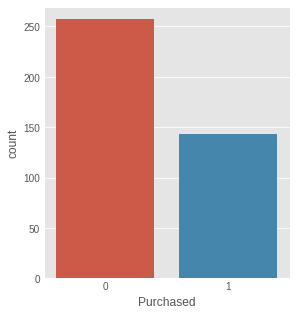

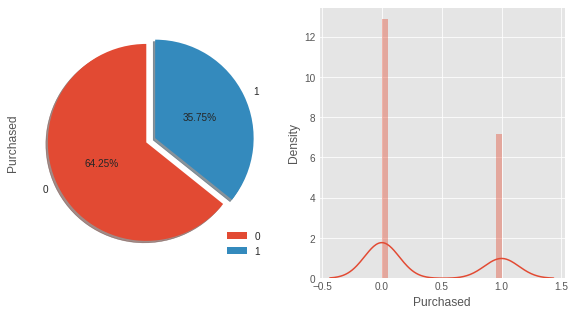

In [52]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

plt.subplot(1, 3, 1)
sns.countplot(df['Purchased'])
plt.show()

plt.xlabel('Purchased', fontsize = 15)

plt.subplot(1, 3, 2)
df['Purchased'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.legend()

plt.subplot(1, 3, 3)
sns.distplot(df["Purchased"], bins = 20)
plt.show()

In [53]:
px.histogram(df, x='Gender', color='Purchased', title='Purchased Or Not')

In [54]:
dummies = pd.get_dummies(df.Gender)

In [55]:
x = df.drop(['Purchased','Gender'], axis = 'columns')
y = df['Purchased']

In [56]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 9) 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [58]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

pred = knn.predict(xtest)

cm = confusion_matrix(ytest, pred)
print(cm,"\n")

print(accuracy_score(ytest, pred),"\n")

print(classification_report(ytest, pred))

[[39  9]
 [14 18]] 

0.7125 

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        48
           1       0.67      0.56      0.61        32

    accuracy                           0.71        80
   macro avg       0.70      0.69      0.69        80
weighted avg       0.71      0.71      0.71        80

